# Data Cleaning Codes

* Data used: *"China HRC Price Model - Edited Combined Data.csv"*

## Import Packages

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [156]:
## use this part, if you are using google colab
#from google.colab import drive
#drive.mount('/content/drive')

## Data Loading

In [157]:
# Load the data and check the first few lines
dataset_path = "China HRC Price Model - Edited Combined Data.csv"
df = pd.read_csv(dataset_path)
df.head()

,Month,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7%,26.6%,248,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7%,26.6%,248,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9%,29.8%,251,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9%,29.6%,257,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12%,30.3%,263,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df.columns

Index(['Month', 'HRC \n(FOB, $/t)', 'Iron Ore \n(CFR, $/t)',
       'HCC \n(Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'RM Cost \n($/t)', 'HRC - RM \nSpread ($/t)', 'CS Production (Mnt)',
       'Exports \n(Mnt)', 'Imports \n(Mnt)', 'Net Exports (Mnt)',
       'Export as % of Production', 'Cummulative FAI growth (%)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t).1', 'ACSU \n(Mnt)',
       'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Iron ore Imports (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)', 'Monthly Iron ore Production (Mt.)',
       'Stocks of iron ore at China's seaport (Mt.)',
       'YTD Growth rate of  Investment  (Fixed asset investment)',
       'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-

## Data Check
* Missing data in columns.
* Duplicates.
* Data types.

In [159]:
dataset.isnull().sum()

Month                                                                               0
HRC \n(FOB, $/t)                                                                    0
Iron Ore \n(CFR, $/t)                                                               0
HCC \n(Aus FOB, $/t)                                                                0
Domestic Scrap (DDP Jiangsu incl. VAT $/t)                                          0
RM Cost \n($/t)                                                                     0
HRC - RM \nSpread ($/t)                                                             0
CS Production (Mnt)                                                                 1
Exports \n(Mnt)                                                                     1
Imports \n(Mnt)                                                                     1
Net Exports (Mnt)                                                                   1
Export as % of Production                             

In [160]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning

### Convert `str` to numeric
As some column values are in string format with percentage sign (%), we delete the sign and convert them to float format.

In [161]:
type(df['Export as % of Production'][0])

str

In [162]:
# Delete % sign from column values
col_w_perc = ['Export as % of Production', 'Cummulative FAI growth (%)',
              'YTD Growth rate of  Investment  (Fixed asset investment)',
              'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
              'Floor space under construction (y-o-y)', 'Automobile Production (y-o-y)',
              'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
              'Air Conditioner (y-o-y)', 'Manufacturing PMI for steel']

for col in col_w_perc:
    df[col] = df[col].apply(lambda x: str(x).rstrip('%') if isinstance(x, str) else x)
    df[col] = pd.to_numeric(df[col])

df.head()

,Month,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,248,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,248,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,251,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,257,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,263,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df.to_csv('after_perc.csv', index=False)

### Convert Month into Month and Year

In [164]:
# Separate 'Month' into 'Month' and 'Year'
df['Month_Dt'] = pd.to_datetime(df['Month'], format='%b-%y')

# Extract the numeric month and year
df['Month'] = df['Month_Dt'].dt.month
df['Year'] = df['Month_Dt'].dt.year

df = df[['Month_Dt', 'Month', 'Year'] + [col for col in df.columns if col not in ['Month_Dt', 'Month', 'Year']]]
df.head()

,Month_Dt,Month,Year,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,1,2006,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,248,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,2,2006,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,248,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,3,2006,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,251,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,4,2006,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,257,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,5,2006,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,263,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Columns with High Correlation Coefficients (>0.8)

<Axes: >

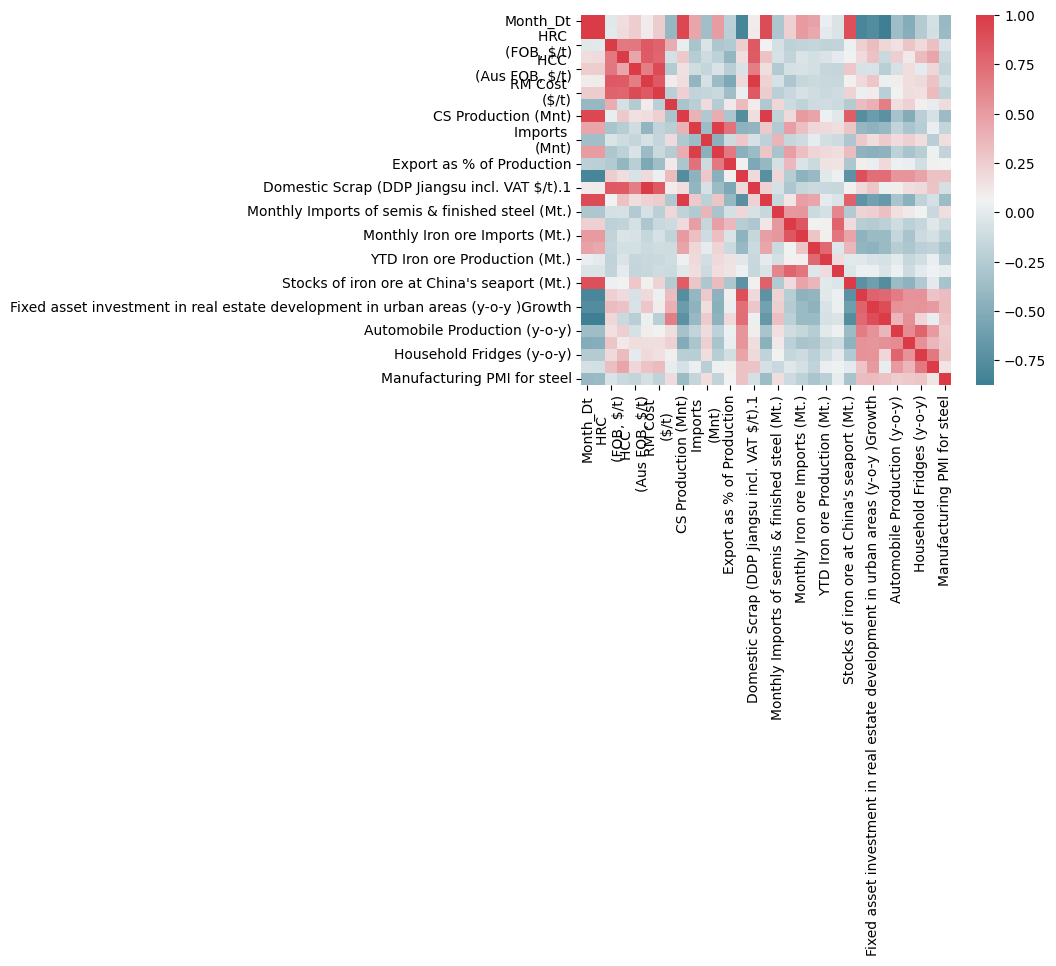

In [165]:
corrdata = df.loc[:, df.columns != 'Month']
corr = corrdata.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), annot=False, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, fmt='.2f' ,  )

We note that there are some variables with high collinearity, hence considering dropping some of them to reduce the computation cost when running the models.
* Firstly, we check for variable pairs with correlation coefficients higher than 0.8.
* As it is advised to keep either `RM Cost ($/t)` or the combination of `Iron Ore (CFR, $/t)` and `HCC (Aus FOB, $/t)`, we choose to keep `RM Cost ($/t)`.
* Next, between a highly correlated pair, we drop the variable with more NaN values.
* Finally, for highly correlated pairs with the same number of NaN values, we compare the variables' range and drop the one with larger range.
    * `Domestic Scrap (DDP Jiangsu incl. VAT $/t)` vs. `RM Cost ($/t)` (corr_coef=0.839700): `RM Cost ($/t)` is dropped.
    * `Exports (Mnt)` vs. `Net Exports (Mnt)` (corr_coef=0.977306): `Net Exports (Mnt)` is dropped.

In [166]:
threshold = 0.8
high_corr_pairs = (
    corr.abs().where(np.triu(np.ones(corr.abs().shape), k=1).astype(bool))  # Keep only upper triangle
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns for clarity
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter pairs with correlation ≥ threshold
high_corr_pairs = pd.DataFrame(high_corr_pairs[high_corr_pairs['Correlation'] >= threshold])

# Compare the numbers of missing values in the correlated columns
missing_counts = df.isnull().sum()
high_corr_pairs['Missing Values (Var 1)'] = high_corr_pairs['Variable 1'].map(missing_counts)
high_corr_pairs['Missing Values (Var 2)'] = high_corr_pairs['Variable 2'].map(missing_counts)

# Display
high_corr_pairs.to_csv('highly_corr_vars.csv', index=False)
high_corr_pairs

,Variable 1,Variable 2,Correlation,Missing Values (Var 1),Missing Values (Var 2)
0,Month_Dt,Year,0.998627,0,0
7,Month_Dt,CS Production (Mnt),0.927683,0,1
12,Month_Dt,Cummulative FAI growth (%),0.826365,0,4
14,Month_Dt,ACSU \n(Mnt),0.910042,0,3
21,Month_Dt,Stocks of iron ore at China's seaport (Mt.),0.888389,0,15
22,Month_Dt,YTD Growth rate of Investment (Fixed asset i...,0.813209,0,23
24,Month_Dt,Floor space under construction (y-o-y),0.873745,0,79
36,Year,CS Production (Mnt),0.929482,0,1
41,Year,Cummulative FAI growth (%),0.824943,0,4
43,Year,ACSU \n(Mnt),0.911666,0,3


In [167]:
columns_of_interest = ['Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 'RM Cost \n($/t)',
                       'Exports \n(Mnt)', 'Net Exports (Mnt)']  # Replace with your column names

# Calculate max, min, and mean for the selected columns
stats = df[columns_of_interest].agg(['max', 'min', 'mean', 'median'])

stats

,Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),Exports \n(Mnt),Net Exports (Mnt)
max,620.000000,832.000000,11.000000,11.000000
min,156.000000,141.000000,1.000000,-1.000000
mean,390.720524,360.366812,5.802632,4.592105
median,388.000000,338.000000,5.000000,4.000000


In [168]:
cols_to_drop = ['Iron Ore \n(CFR, $/t)', 'HCC \n(Aus FOB, $/t)', 'RM Cost \n($/t)',
                'Net Exports (Mnt)', 'ACSU \n(Mnt)', 'Monthly Iron ore Imports (Mt.)',
                "Stocks of iron ore at China's seaport (Mt.)", 'YTD Growth rate of  Investment  (Fixed asset investment)',
                'Floor space under construction (y-o-y)']

df.drop(columns=cols_to_drop, inplace=True)

### Total Number of Independent Variables (Factors to be Used for Prediction)

In [175]:
print(df.loc[:, df.columns.difference(['Month_Dt', 'Month', 'Year', 'HRC \n(FOB, $/t)'])].columns)
len(df.loc[:, df.columns.difference(['Month_Dt', 'Month', 'Year', 'HRC \n(FOB, $/t)'])].columns)

Index(['Air Conditioner (y-o-y)', 'Automobile Production (y-o-y)',
       'CS Production (Mnt)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
       'Cummulative FAI growth (%)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t).1',
       'Export as % of Production', 'Exports \n(Mnt)',
       'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
       'HRC - RM \nSpread ($/t)', 'Household Fridges (y-o-y)',
       'Imports \n(Mnt)', 'Manufacturing PMI for steel',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Iron ore Production (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)'],
      dtype='object')


19

In [170]:
df.to_csv('after_drop_cols.csv', index=False)

### Fill NaN Values with their Succeeding Values
As the values before September 2006 for columns in Data 2 are not collected, the missing data is not random, hence we are not imputing them with the succeeding values as advised by the project owner.

In [171]:
mask = df['Month_Dt'] > '2006-08-01'

# For rows after 'Aug-06', fill missing values with the previous row's value
df.loc[mask] = df.loc[mask].fillna(method='bfill')
df.head(20)

,Month_Dt,Month,Year,"HRC \n(FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,1,2006,388,248,187,30.0,2.0,2.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,2,2006,388,248,185,30.0,2.0,1.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,3,2006,449,251,244,33.0,3.0,2.0,9.0,29.8,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,4,2006,478,257,271,35.0,3.0,2.0,9.0,29.6,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,5,2006,505,263,300,36.0,4.0,2.0,12.0,30.3,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2006-06-01,6,2006,559,266,354,37.0,5.0,2.0,15.0,31.3,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006-07-01,7,2006,540,244,332,36.0,4.0,2.0,12.0,30.5,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006-08-01,8,2006,495,253,283,37.0,5.0,2.0,14.0,29.1,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2006-09-01,9,2006,472,252,261,36.0,5.0,2.0,14.0,28.2,252,1.61,5.14,247.20,405.80,56.50,24.3,24.0,6.0,34.2,3.9,51.7
9,2006-10-01,10,2006,477,260,292,38.0,5.0,1.0,14.0,26.8,260,1.42,5.19,297.69,462.30,56.50,24.1,25.1,11.4,31.8,6.7,55.9


In [172]:
df.to_csv('after_fillna.csv')

For model testing purpose, we drop all the rows with NaN values to avoid potential errors.

In [173]:
df_wo_na = df.dropna()
df_wo_na.to_csv('wo_na.csv')